<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv', encoding="cp949")

In [ ]:
# 종속변수의 비율 확인
print(df['종속변수'].value_counts(normalize=True))


0    0.791667
1    0.208333
Name: 종속변수, dtype: float64


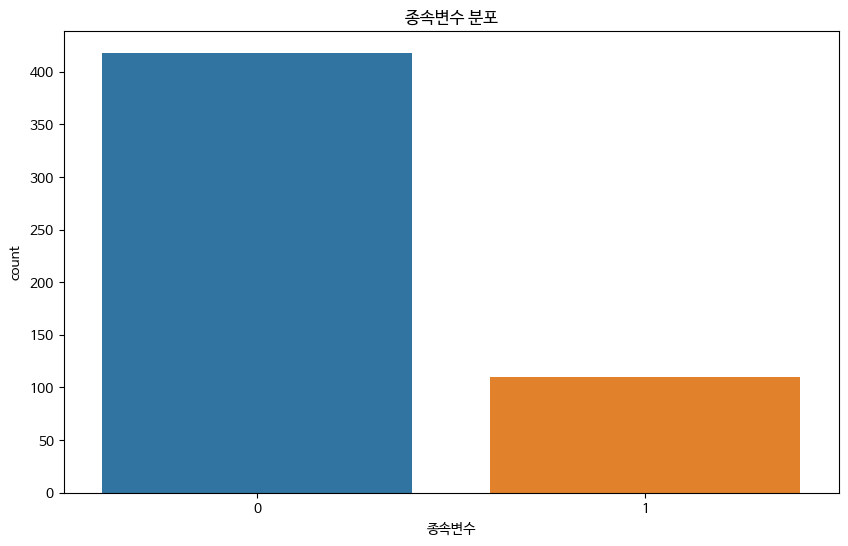

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='종속변수', data=df)
plt.title('종속변수 분포')
plt.show()


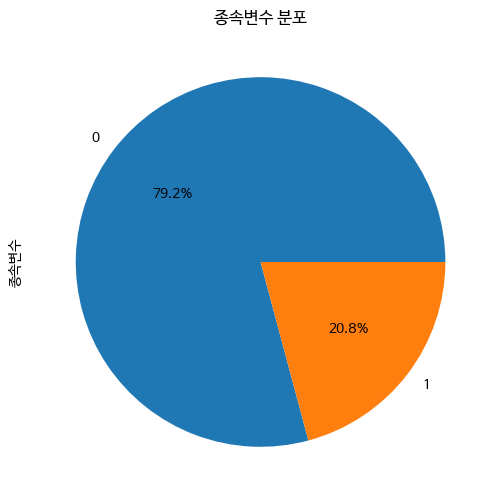

In [ ]:
plt.figure(figsize=(10, 6))
df['종속변수'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('종속변수 분포')
plt.show()


## 기업명을 숫자 id로 변환

In [ ]:
df['기업명'] = pd.factorize(df['기업명'])[0]
df['기업명']


0        0
1        1
2        2
3        3
4        4
      ... 
523    523
524    524
525    525
526    526
527    527
Name: 기업명, Length: 528, dtype: int64

In [ ]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
0,0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


In [ ]:
df.set_index('기업명', inplace=True)
df.head()

,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,43000,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,15000,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


## 불필요한 칼럼삭제

In [ ]:
df = df.drop(['상장년도', '상장 시기(상장월)', '주간사',  '신주모집','구주매출', '시장구분', '업종', '업종코드',
              '업종(대분류)한국표준산업분류(10차)', '기업구분', '공모규모(단위:억)', '유통가능주식합계(주식수)'], axis=1)

In [ ]:
df.head()

,종속변수,신규상장일,최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,...,총 공모주식 수,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,2023-05-24,4,12,0.33,34400,39700,43000,1.08,1669.60,...,2218258,0,"43,973","14,264","2,121",0.69,0.06,0.25,12700000,0.2569
1,1,2023-05-19,4,11,0.36,7500,9800,9800,1.00,1715.41,...,2000000,0,"12,014","2,134","1,239",0.74,0.01,0.25,12400000,0.2474
2,0,2023-05-19,4,11,0.36,17200,23200,15000,0.65,86.44,...,1500000,0,"12,273","-1,686","5,048",0.70,0.05,0.25,9966633,0.4903
3,0,2023-05-17,4,10,0.40,10000,12000,12000,1.00,1688.87,...,2500000,0,"35,980",852,"1,099",0.75,0.00,0.25,11000000,0.3809
4,0,2023-05-04,7,13,0.54,16000,18000,18000,1.00,854.29,...,750000,0,"8,868","-5,242","5,496",0.75,0.00,0.25,11000000,0.2690


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   종속변수                             528 non-null    int64  
 1   신규상장일                            528 non-null    object 
 2   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  528 non-null    int64  
 3   최근 3개월 공모주 수                     528 non-null    int64  
 4   최근 "따" 비율                        528 non-null    float64
 5   희망공모가_하한                         528 non-null    int64  
 6   희망공모가_상한                         528 non-null    int64  
 7   공모가                              528 non-null    int64  
 8   밴드수익률(공모가/공모가_상한)                528 non-null    float64
 9   기관경쟁률                            528 non-null    float64
 10  청약경쟁률                            528 non-null    float64
 11  의무보유확약                           528 non-null    float64
 12  대표주간사                 

In [ ]:
print(df.describe())

             종속변수  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  최근 3개월 공모주 수   최근 "따" 비율  \
count  528.000000                       528.000000    528.000000  528.000000   
mean     0.208333                         3.498106     16.867424    0.209034   
std      0.406502                         3.412778      6.336353    0.176051   
min      0.000000                         0.000000      1.000000    0.000000   
25%      0.000000                         1.000000     13.000000    0.070000   
50%      0.000000                         2.000000     17.000000    0.150000   
75%      0.000000                         5.000000     21.000000    0.320000   
max      1.000000                        17.000000     34.000000    0.770000   

            희망공모가_하한       희망공모가_상한            공모가  밴드수익률(공모가/공모가_상한)  \
count     528.000000     528.000000     528.000000         528.000000   
mean    16750.634470   20059.488636   18410.340909           0.941742   
std     17512.012224   20353.408890   16725.480915          

## Object를 int로 변환

In [ ]:
# '주간사' 열의 고유한 값들을 추출
unique_agents = df['대표주간사'].unique()

# 각 범주에 대한 고유한 정수를 생성
# 이를 위해 범주를 인덱스로 변환하고, 인덱스를 범주에 매핑하는 딕셔너리를 생성
agent_to_int = {agent: i for i, agent in enumerate(unique_agents)}

# 매핑을 데이터에 적용하여 '주간사' 열을 정수로 변환
df['대표주간사'] = df['대표주간사'].map(agent_to_int)

In [ ]:
df['매출액(백만원)'] = df['매출액(백만원)'].str.replace(',', '').astype(int)
df['순이익(백만원)'] = df['순이익(백만원)'].str.replace(',', '').astype(int)
df['자본금(백만원)'] = df['자본금(백만원)'].str.replace(',', '').astype(int)
df['구주매출(비율)'] = df['구주매출(비율)'].str.replace('#DIV/0!', '0').astype(float) # 0이 #DIV/0!로 변환되기 때문에 다시 0으로 변환해줌
df['신규상장일'] = df['신규상장일'].str.replace('-','').astype(int)

In [ ]:
df.head()

,종속변수,신규상장일,최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,...,총 공모주식 수,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,20230524,4,12,0.33,34400,39700,43000,1.08,1669.60,...,2218258,0.0,43973,14264,2121,0.69,0.06,0.25,12700000,0.2569
1,1,20230519,4,11,0.36,7500,9800,9800,1.00,1715.41,...,2000000,0.0,12014,2134,1239,0.74,0.01,0.25,12400000,0.2474
2,0,20230519,4,11,0.36,17200,23200,15000,0.65,86.44,...,1500000,0.0,12273,-1686,5048,0.70,0.05,0.25,9966633,0.4903
3,0,20230517,4,10,0.40,10000,12000,12000,1.00,1688.87,...,2500000,0.0,35980,852,1099,0.75,0.00,0.25,11000000,0.3809
4,0,20230504,7,13,0.54,16000,18000,18000,1.00,854.29,...,750000,0.0,8868,-5242,5496,0.75,0.00,0.25,11000000,0.2690


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   종속변수                             528 non-null    int64  
 1   신규상장일                            528 non-null    int64  
 2   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  528 non-null    int64  
 3   최근 3개월 공모주 수                     528 non-null    int64  
 4   최근 "따" 비율                        528 non-null    float64
 5   희망공모가_하한                         528 non-null    int64  
 6   희망공모가_상한                         528 non-null    int64  
 7   공모가                              528 non-null    int64  
 8   밴드수익률(공모가/공모가_상한)                528 non-null    float64
 9   기관경쟁률                            528 non-null    float64
 10  청약경쟁률                            528 non-null    float64
 11  의무보유확약                           528 non-null    float64
 12  대표주간사                 

## 데이터 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# 오버샘플링
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


In [ ]:
import pandas as pd

# X_resampled와 y_resampled를 DataFrame으로 변환
df_resampled = pd.DataFrame(X_res, columns=X.columns)  # X.columns는 원래 데이터의 feature 이름들입니다.
df_resampled['종속변수'] = y_res

# DataFrame을 csv 파일로 저장
df_resampled.to_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPO원본_resampled_data.csv', index=False)


## 확인하기

In [ ]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPO원본_resampled_data.csv')

In [ ]:
df.head()

,신규상장일,최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,...,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),종속변수
0,20230524,4,12,0.33,34400,39700,43000,1.08,1669.60,823.74,...,0.0,43973,14264,2121,0.69,0.06,0.25,12700000,0.2569,0
1,20230519,4,11,0.36,7500,9800,9800,1.00,1715.41,1785.11,...,0.0,12014,2134,1239,0.74,0.01,0.25,12400000,0.2474,1
2,20230519,4,11,0.36,17200,23200,15000,0.65,86.44,53.06,...,0.0,12273,-1686,5048,0.70,0.05,0.25,9966633,0.4903,0
3,20230517,4,10,0.40,10000,12000,12000,1.00,1688.87,1481.83,...,0.0,35980,852,1099,0.75,0.00,0.25,11000000,0.3809,0
4,20230504,7,13,0.54,16000,18000,18000,1.00,854.29,994.80,...,0.0,8868,-5242,5496,0.75,0.00,0.25,11000000,0.2690,0
